In [1]:
#Victor Gabaldon Moreno (vicgabal@ucm.es). Trabajo fin de Máster sobre contaminación lumínica en Madrid con fotometría de imágenes tomadas desde el espacio.

#En este programa se empezó una línea de investigación para identificar fuentes luminosas usando segmentación de imagen para sustraer el fondo. Esta línea fue abandonada pero el programa podría mejorarse más adelante.

In [ ]:
import photutils
import astropy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.figure as f
import astropy.io.fits as fits
from math import pi
import pandas
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import lmfit as lm
from photutils import detect_threshold
from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils import detect_sources
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import os,sys,glob
import matplotlib as mpl
from matplotlib.pyplot import figure, show, rc, grid, savefig
from matplotlib.ticker import MultipleLocator
import numpy as np
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground

dpi=200
plt.rcParams['figure.dpi']= dpi

# %matplotlib qt

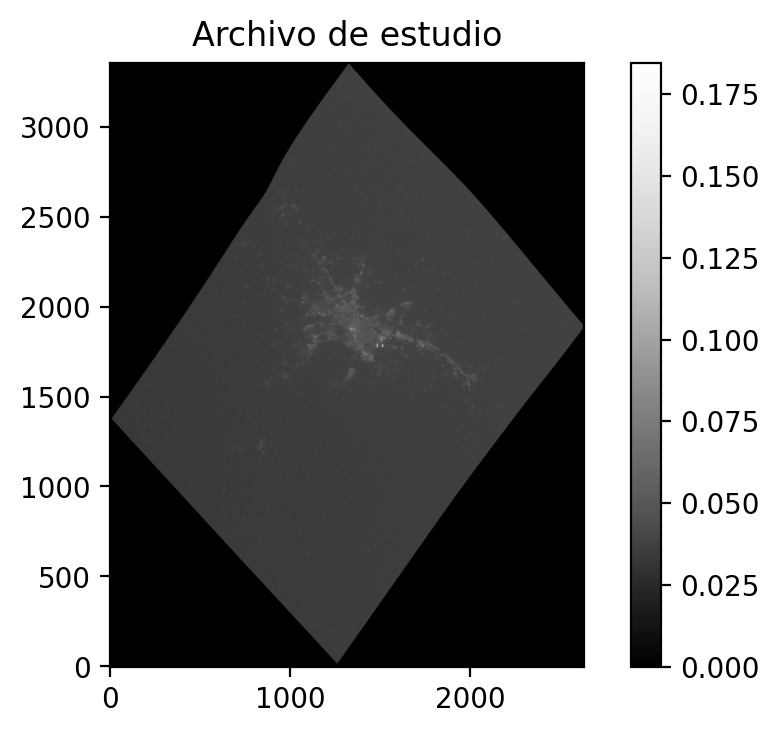

In [2]:
#ABRIDOR DE .fits

img = fits.open('C:\\Users\\Victor\\Dropbox\\2019-2020 Master Astro\\TFM\\Imagenes georeferenciadas\\Puntos de interés\\Ficheros_fits_test\\Corr_iss062e102209B4F.cal2N.Ao2_rect.fits')
data = img[0].data

plt.imshow(data, origin='lower',cmap='Greys_r')
plt.title('Archivo de estudio')
plt.colorbar()
plt.show()

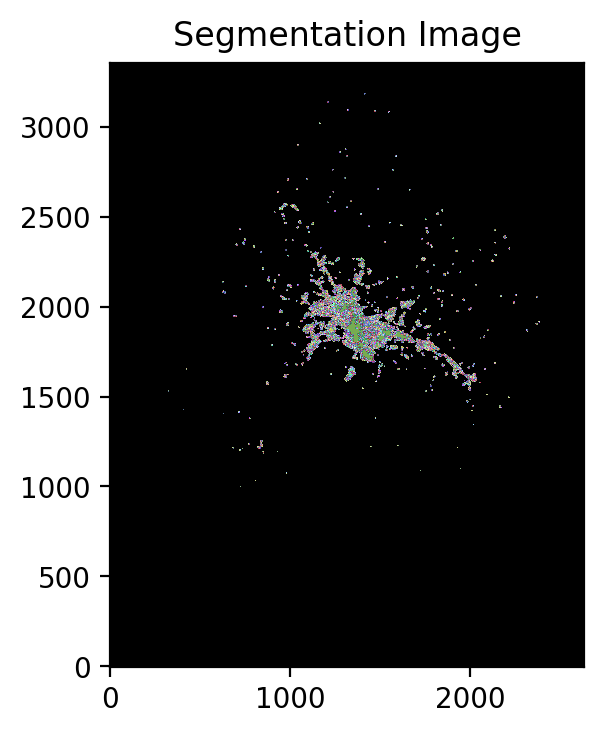

Creado el fichero Prueba.tiff


In [3]:
#DETECCION DE FUENTES EXTENSAS PARA 1 IMAGEN codigo sacado de https://photutils.readthedocs.io/en/stable/segmentation.html

threshold = detect_threshold(data, nsigma=1.4) #nsigma: The number of standard deviations per pixel above the background for which to consider a pixel as possibly being part of a source.
sigma = 3 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(data, threshold, npixels=4, filter_kernel=None, connectivity=4) #npixels=connected pixels that are each greater than the corresponding pixel-wise threshold level defined
cmap = segm.make_cmap(random_state=12345)

plt.show()
imshow(segm, origin='lower', cmap=cmap)

plt.title('Segmentation Image')
plt.show()
plt.imsave('prueba.tiff', segm, cmap=cmap)
print('Creado el fichero '+'Prueba.tiff')

In [14]:
segm #salen muchos segmentos, bastantes más que si hicieramos el mismo análisis sobre imágenes CON fondo.

<photutils.segmentation.core.SegmentationImage>
shape: (3356, 2636)
nlabels: 369
max_label: 369

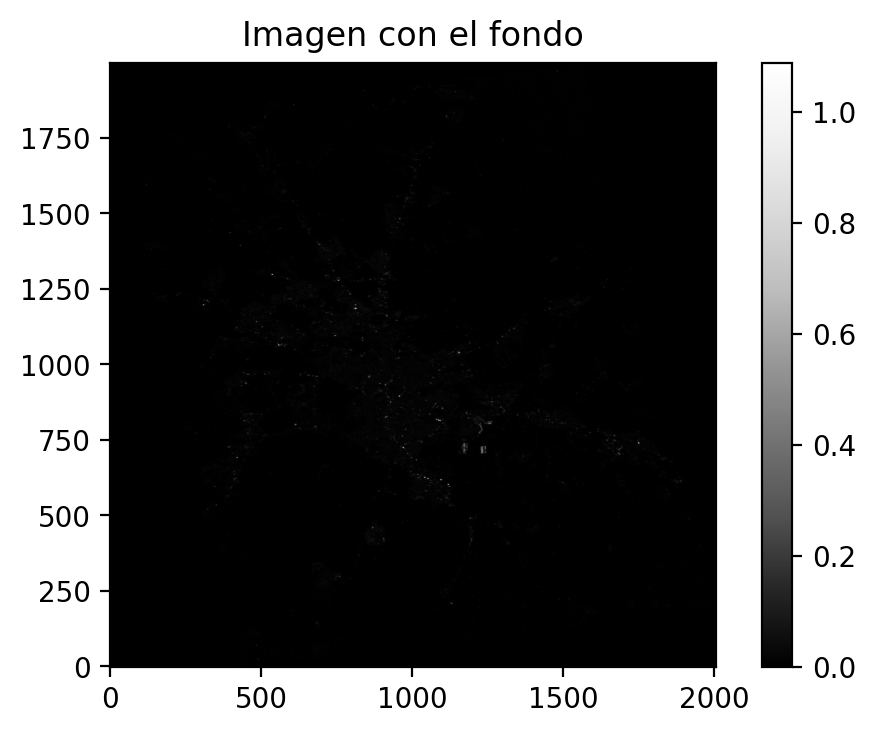

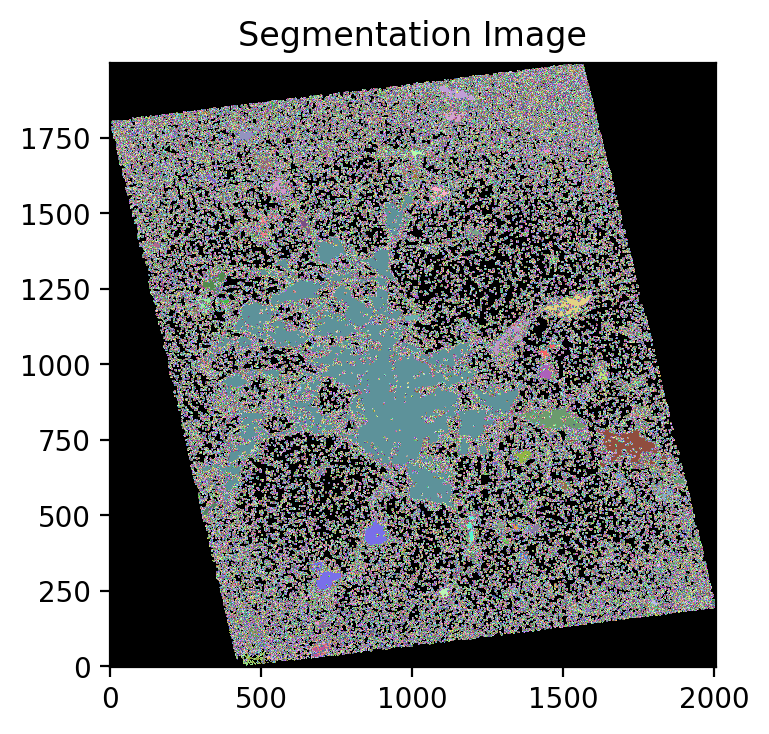

Creado el fichero Corr_iss030e082052B4F.cal2N.Ao2_rect.fits_con_fondo_.tiff


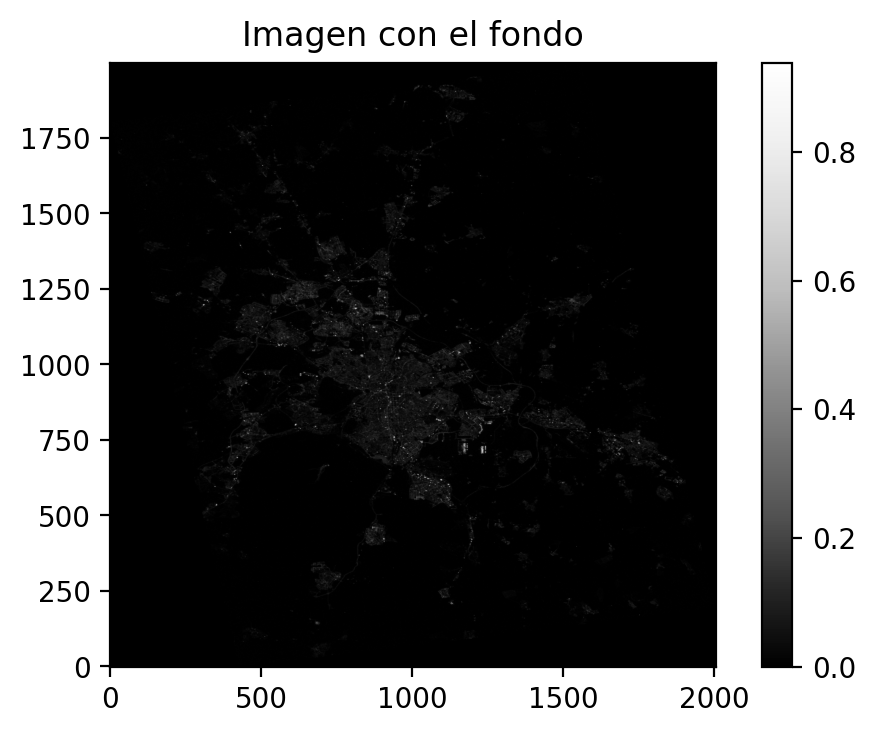

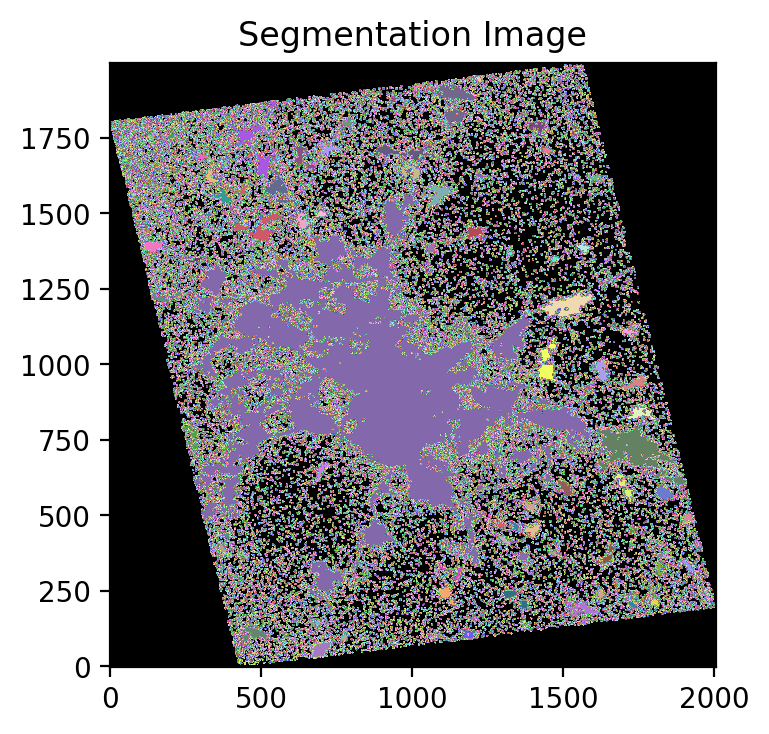

Creado el fichero Corr_iss030e082052G2F.cal2N.Ao2_rect.fits_con_fondo_.tiff


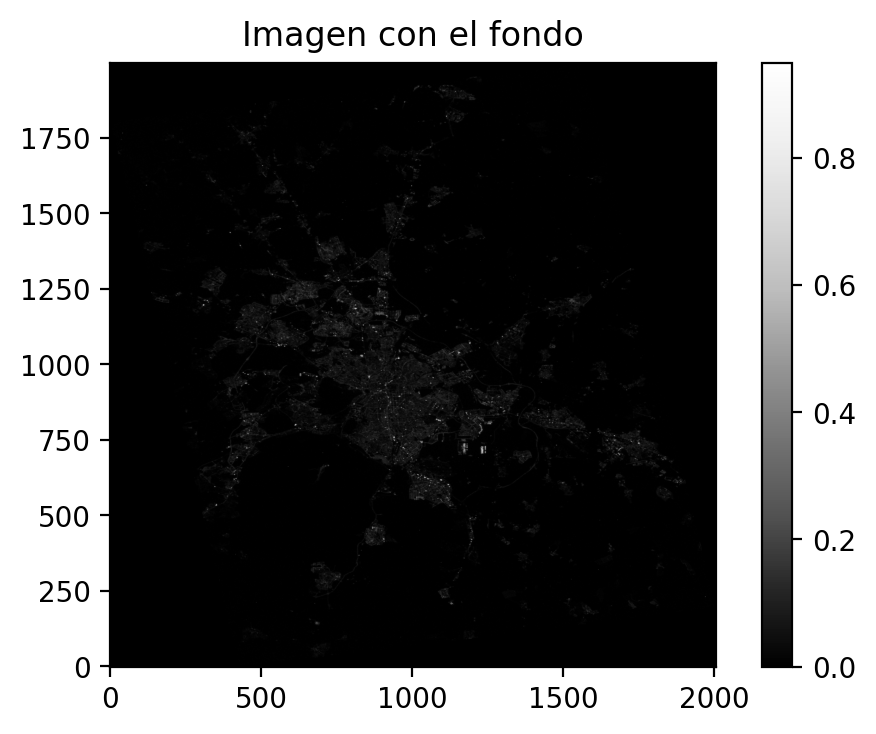

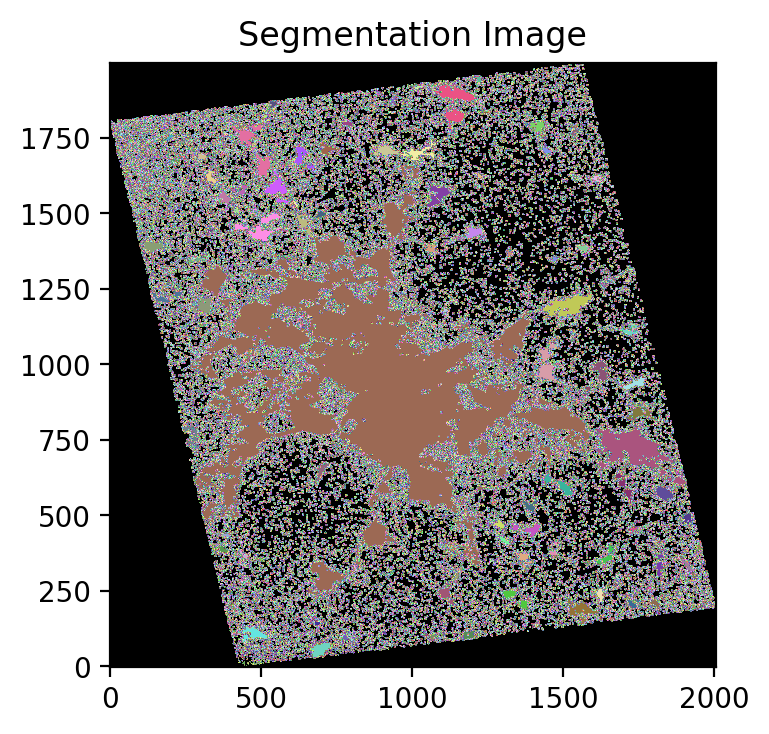

Creado el fichero Corr_iss030e082052G3F.cal2N.Ao2_rect.fits_con_fondo_.tiff


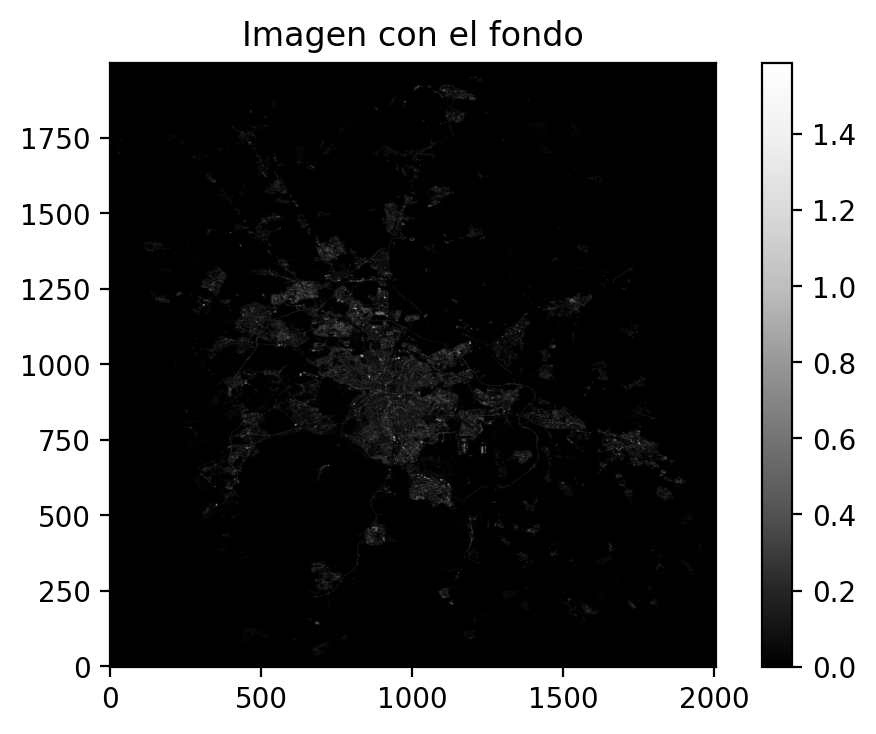

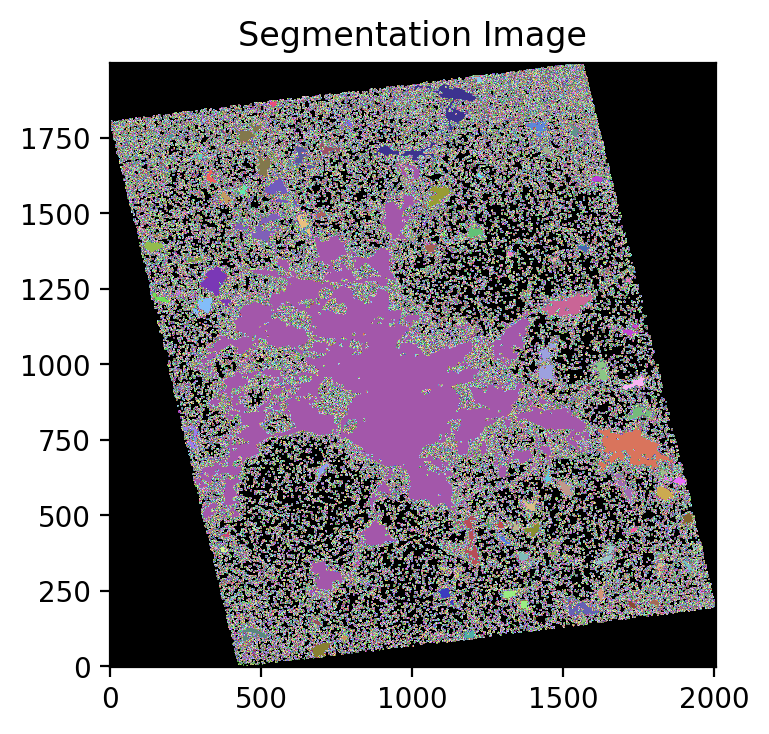

Creado el fichero Corr_iss030e082052R1F.cal2N.Ao2_rect.fits_con_fondo_.tiff


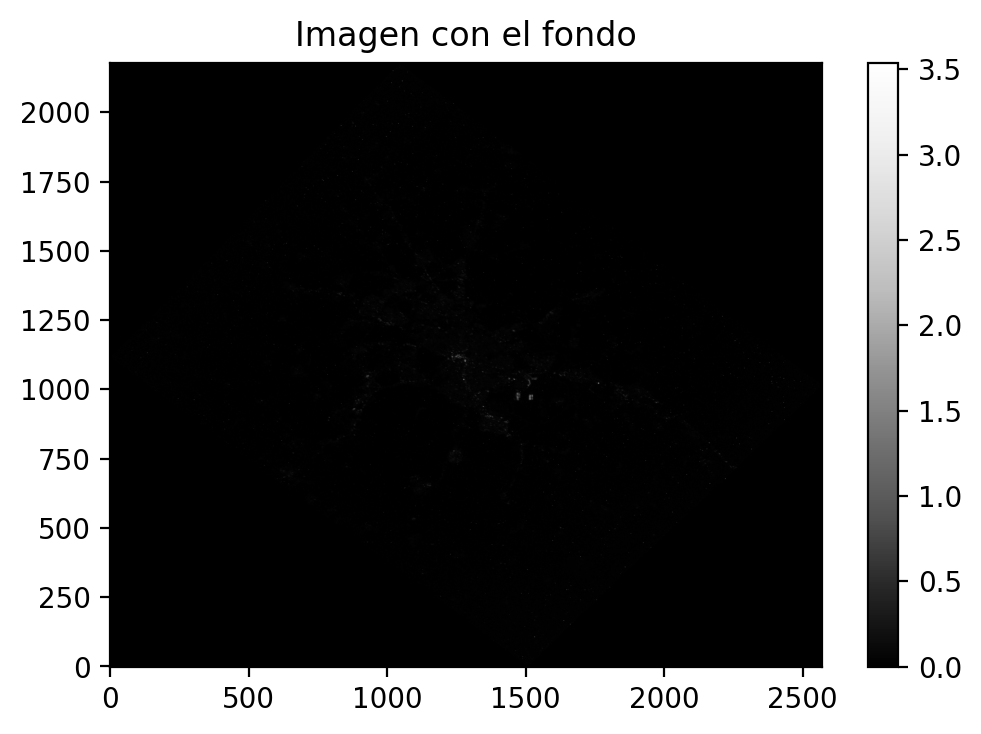

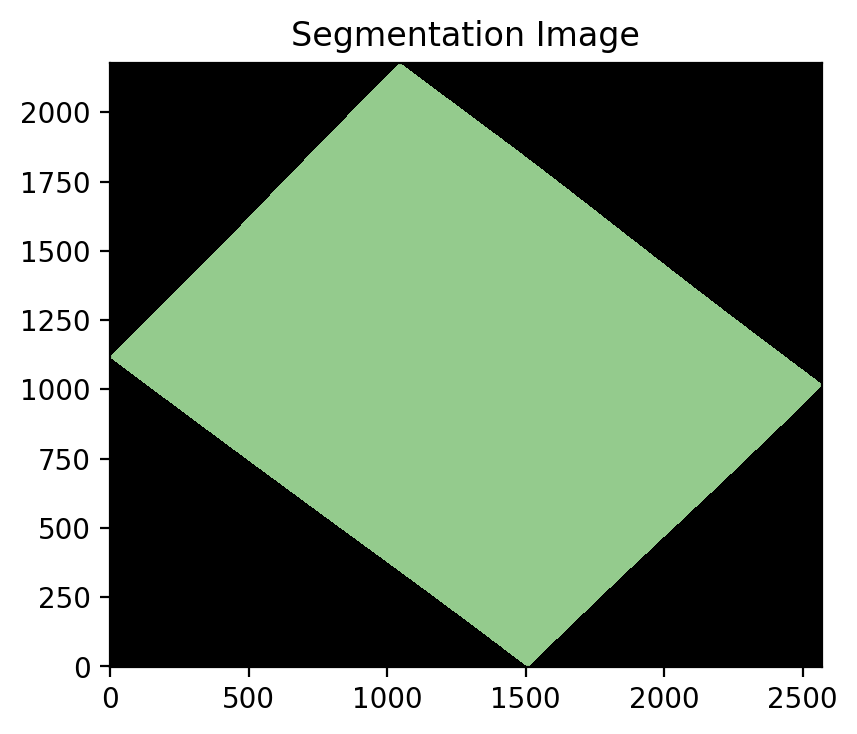

Creado el fichero Corr_iss030e209274B4F.cal2N.Ao2_rect.fits_con_fondo_.tiff


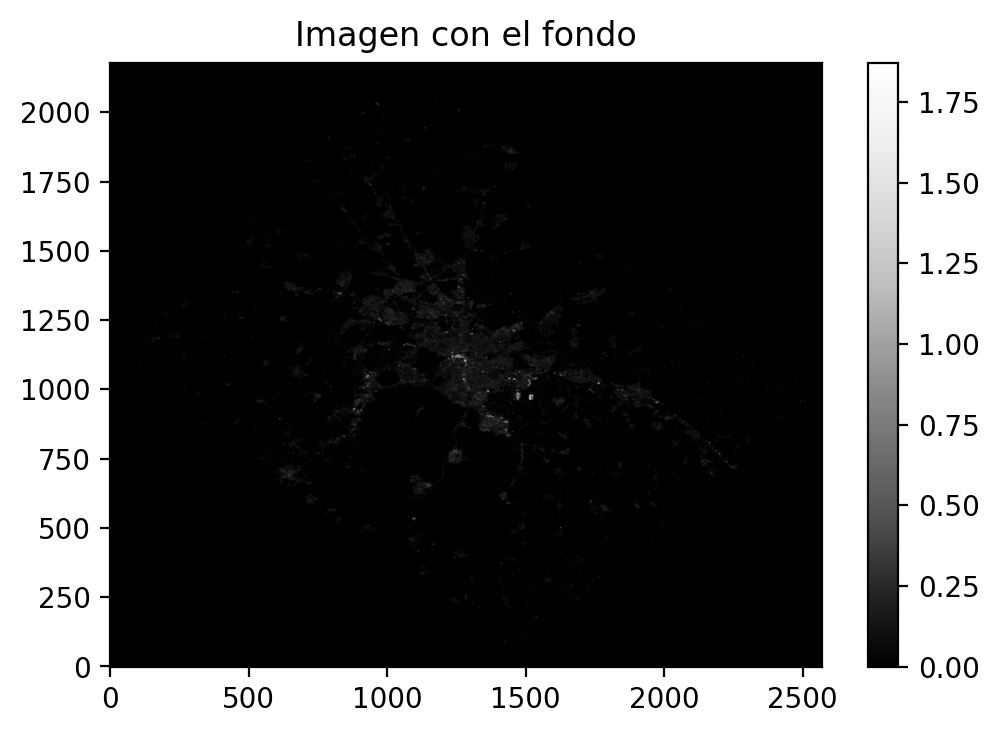

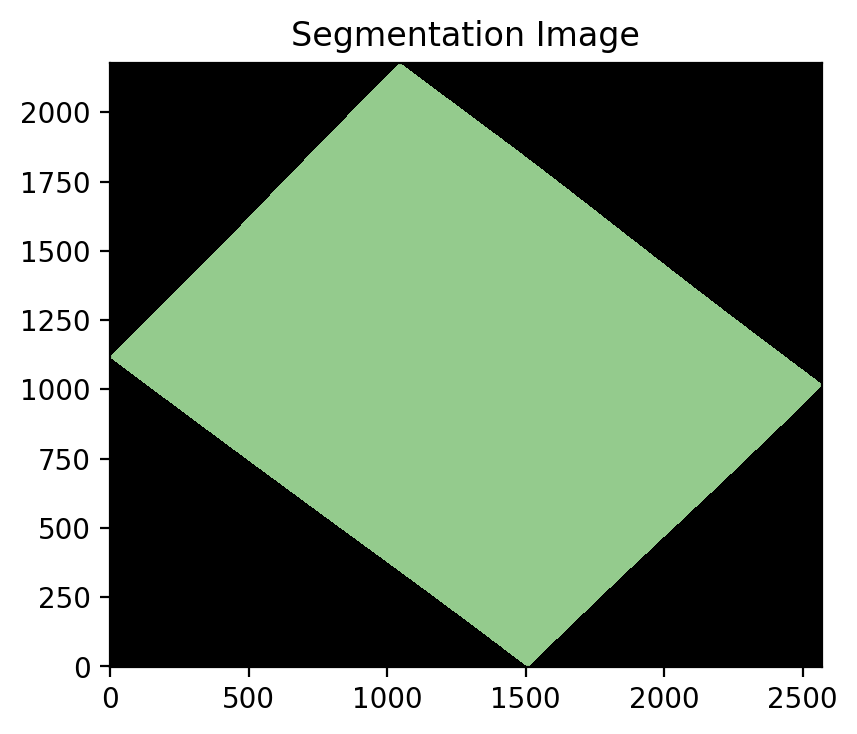

Creado el fichero Corr_iss030e209274G2F.cal2N.Ao2_rect.fits_con_fondo_.tiff


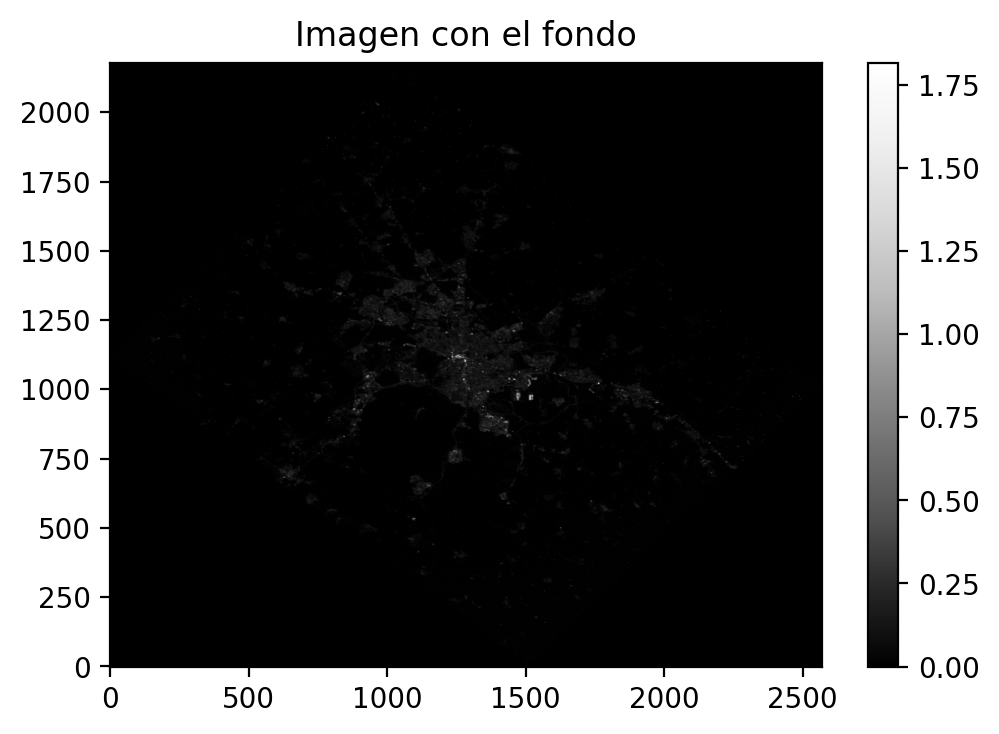

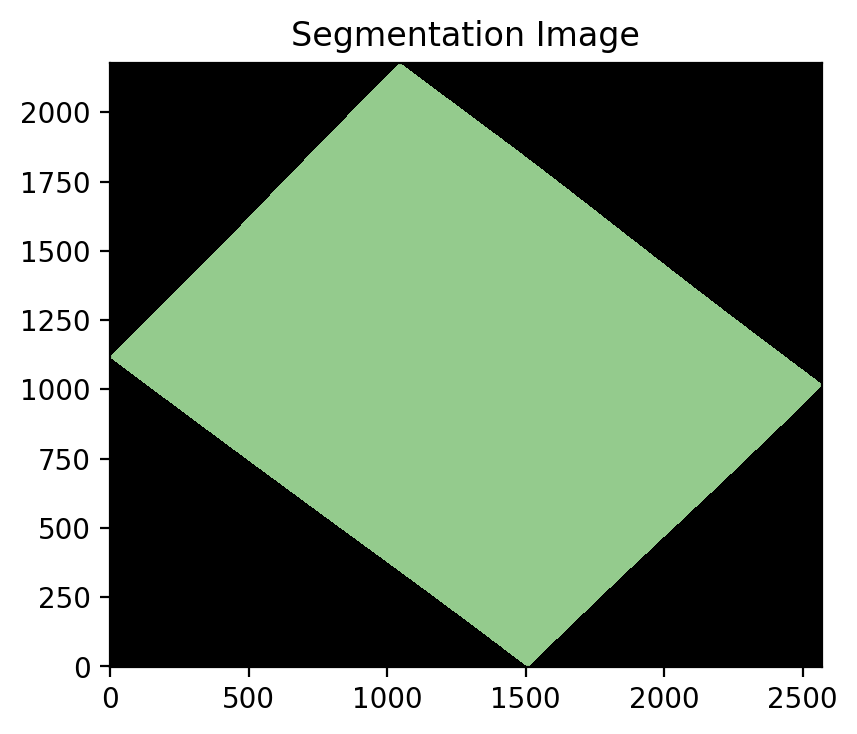

Creado el fichero Corr_iss030e209274G3F.cal2N.Ao2_rect.fits_con_fondo_.tiff


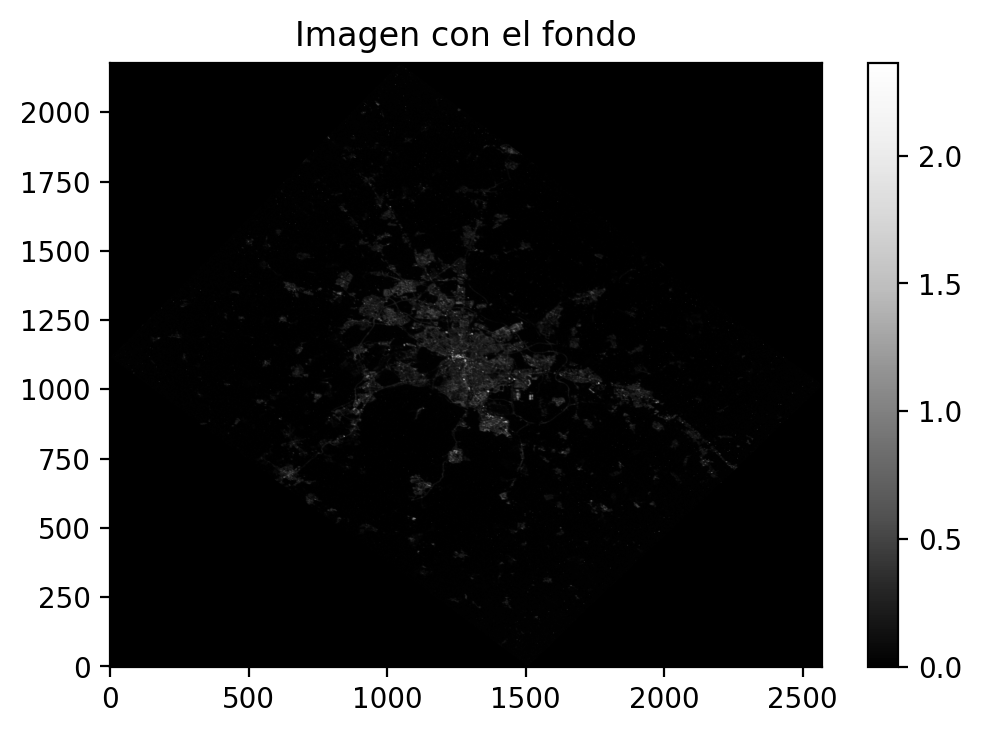

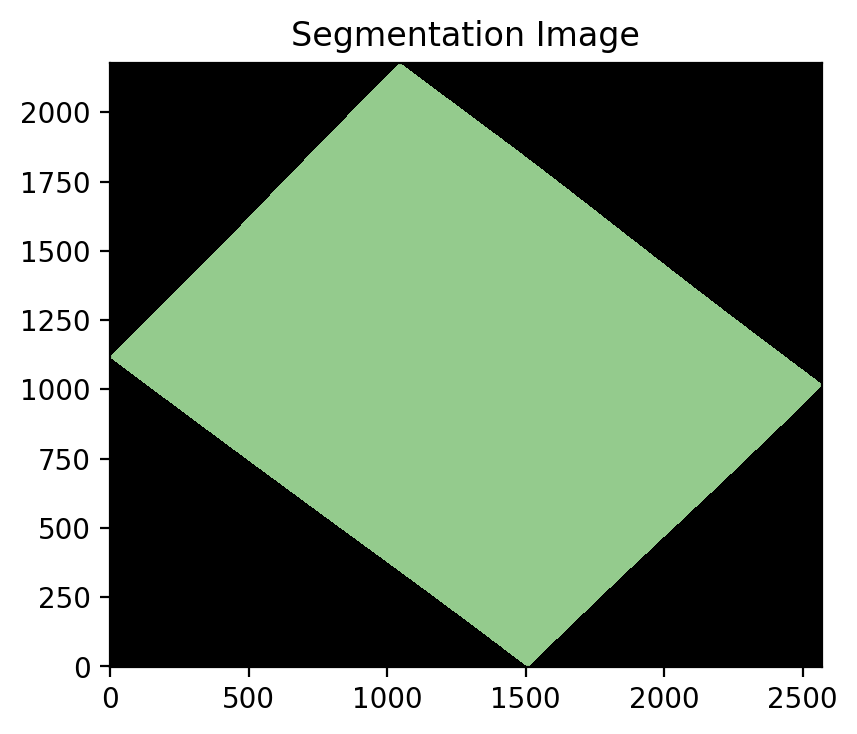

Creado el fichero Corr_iss030e209274R1F.cal2N.Ao2_rect.fits_con_fondo_.tiff


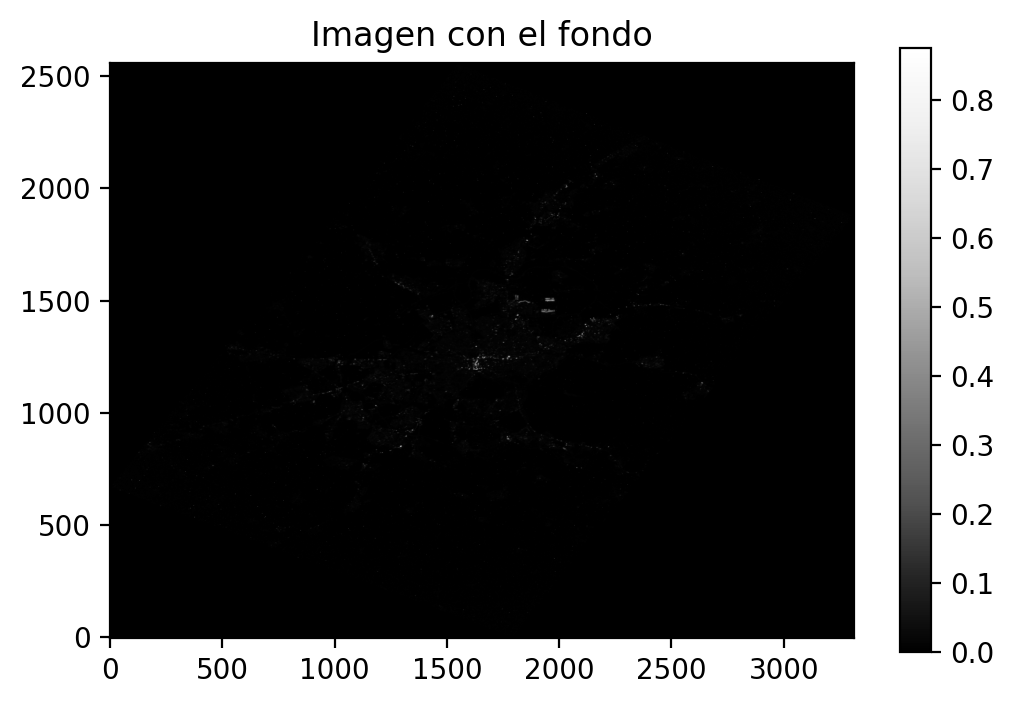

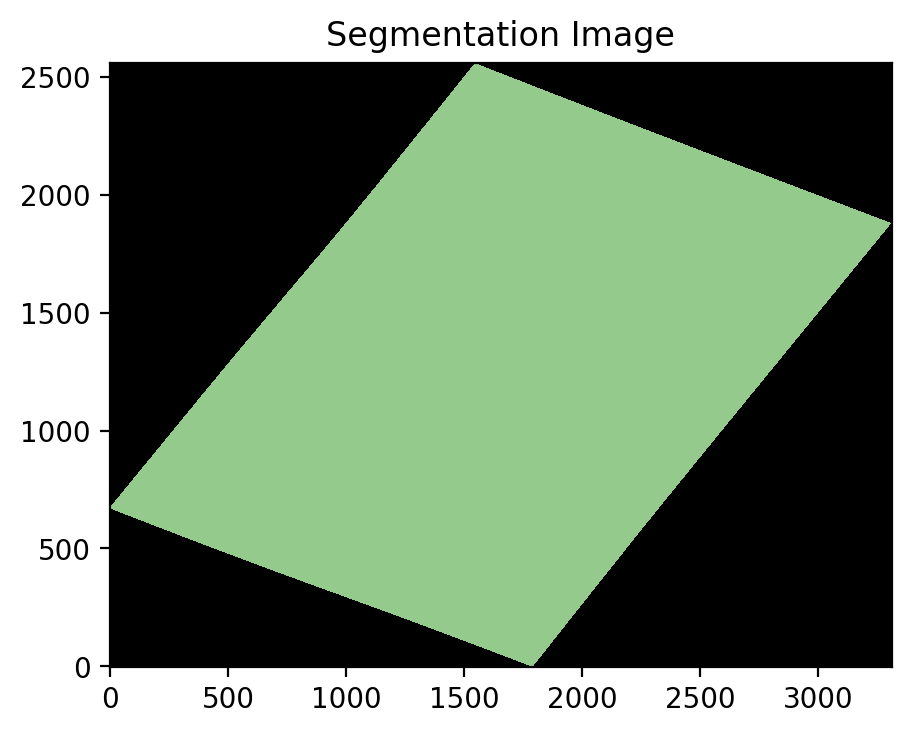

Creado el fichero Corr_iss030e209462B4F.cal2N.Ao2_rect.fits_con_fondo_.tiff


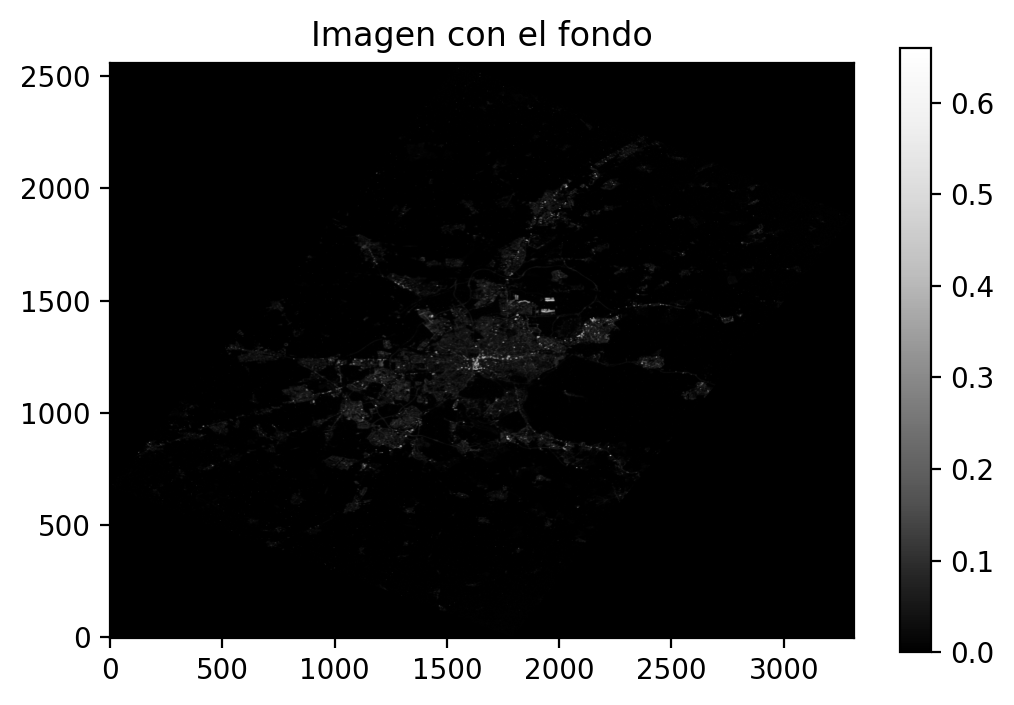

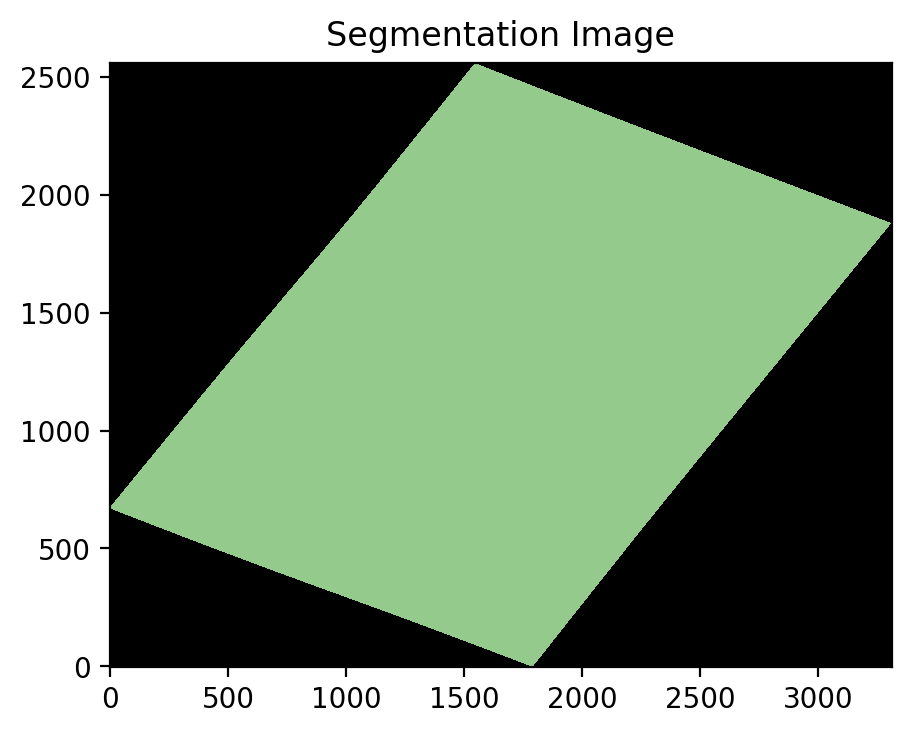

Creado el fichero Corr_iss030e209462G2F.cal2N.Ao2_rect.fits_con_fondo_.tiff


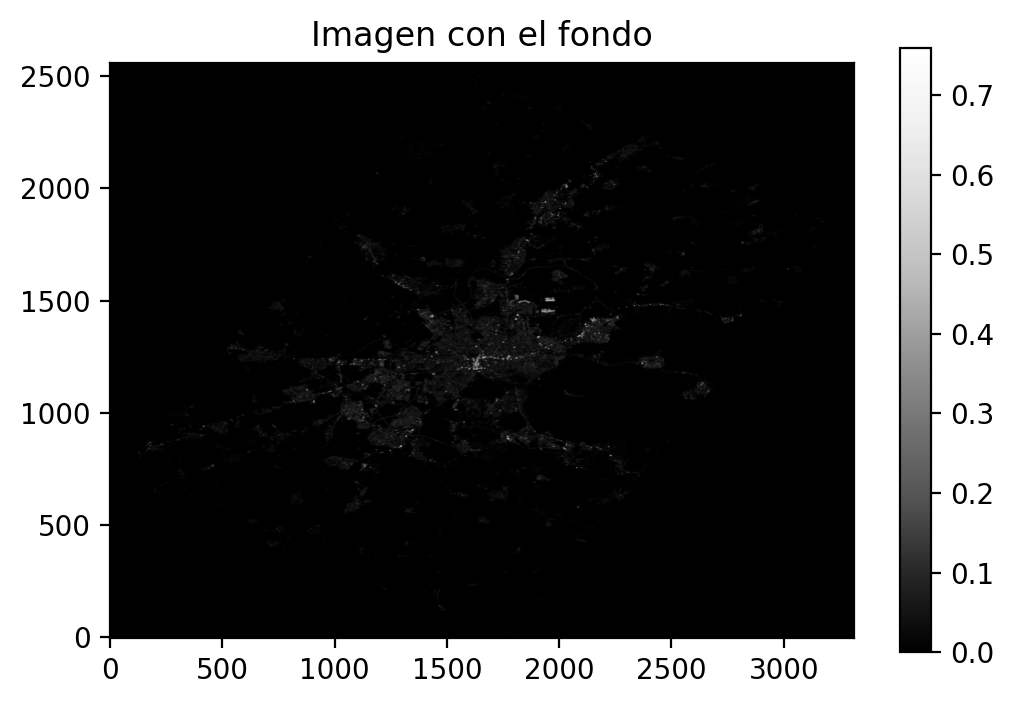

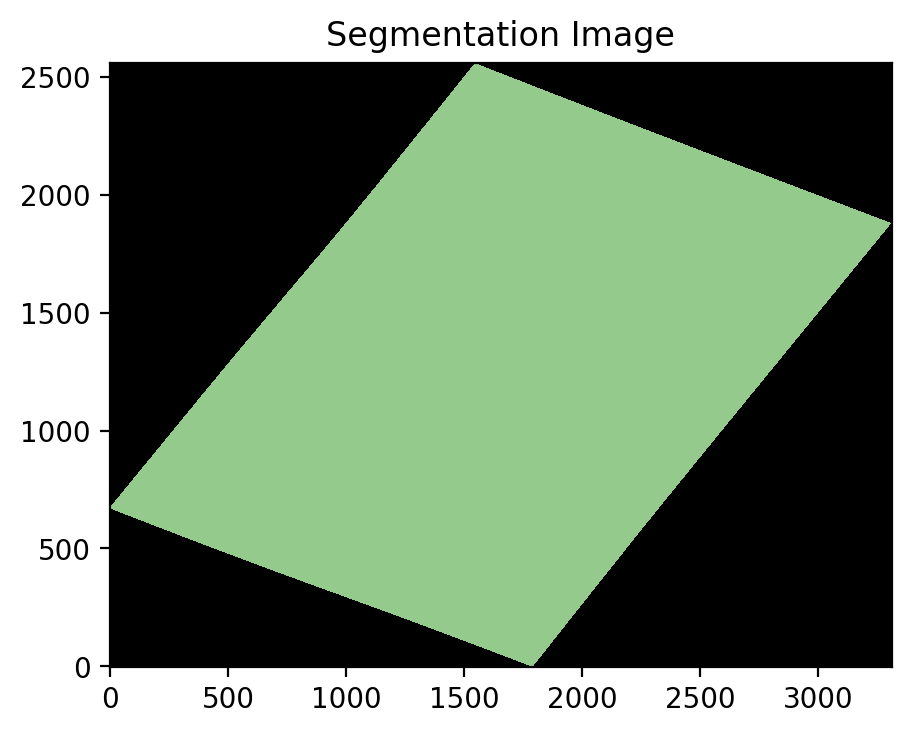

Creado el fichero Corr_iss030e209462G3F.cal2N.Ao2_rect.fits_con_fondo_.tiff


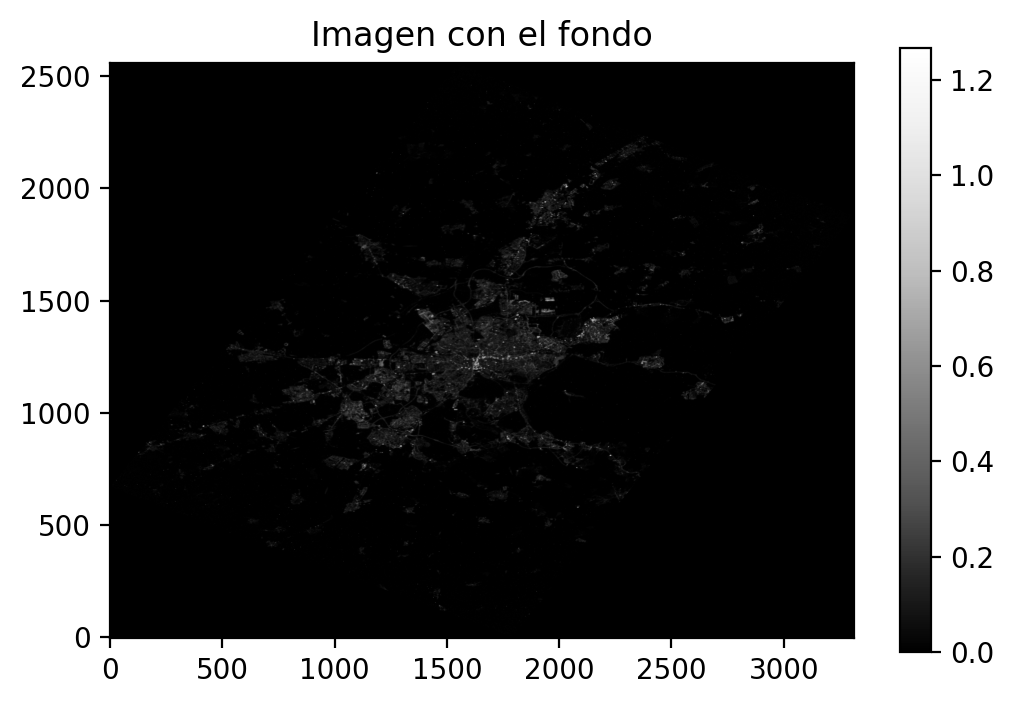

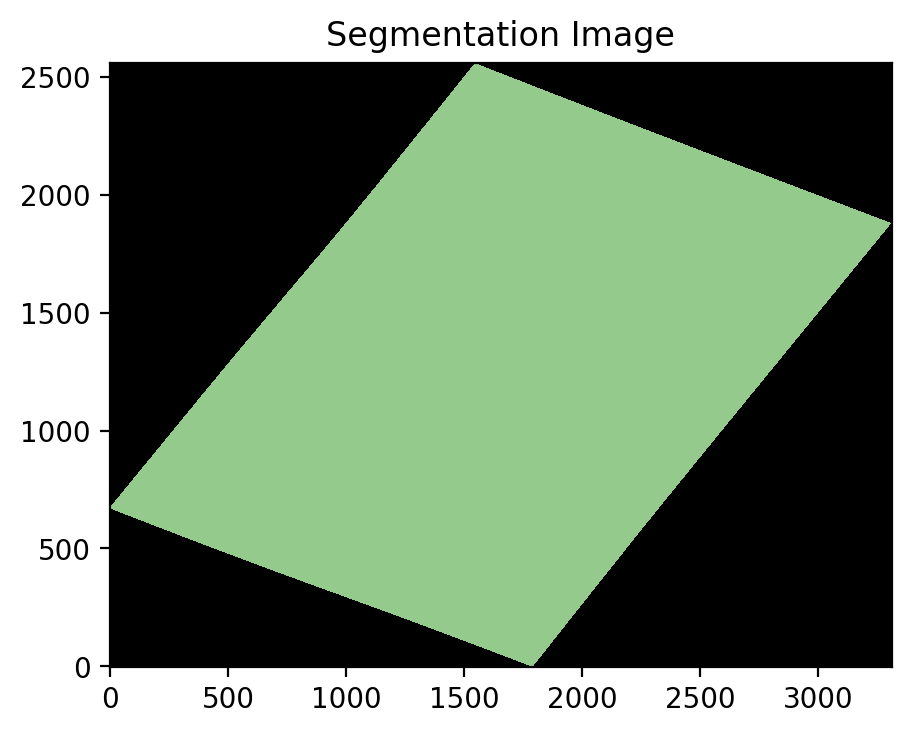

Creado el fichero Corr_iss030e209462R1F.cal2N.Ao2_rect.fits_con_fondo_.tiff


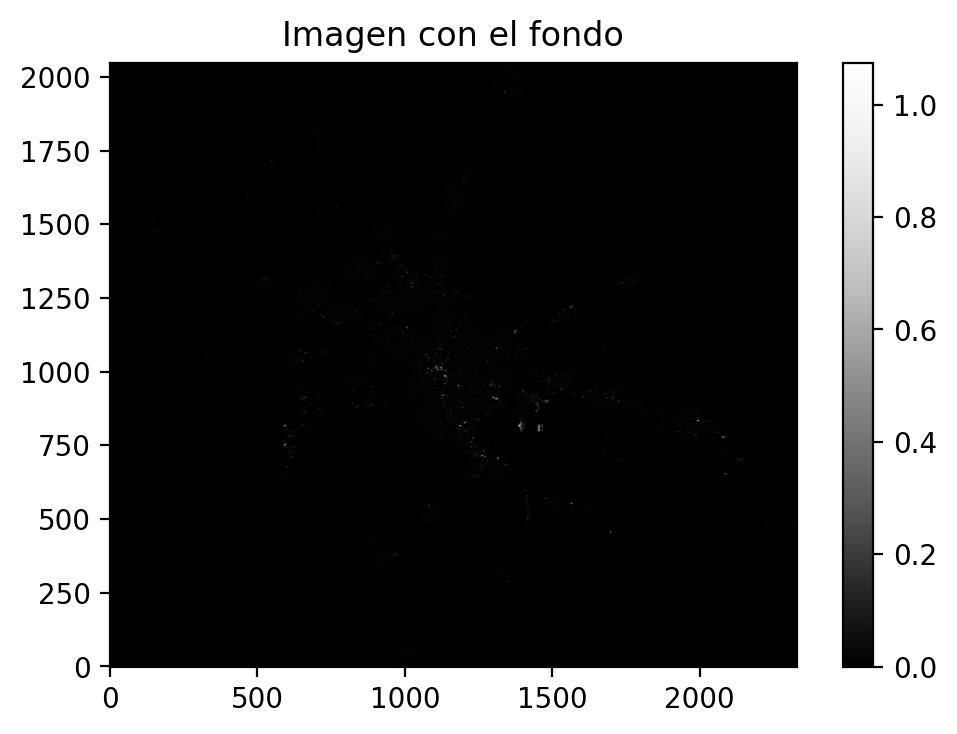

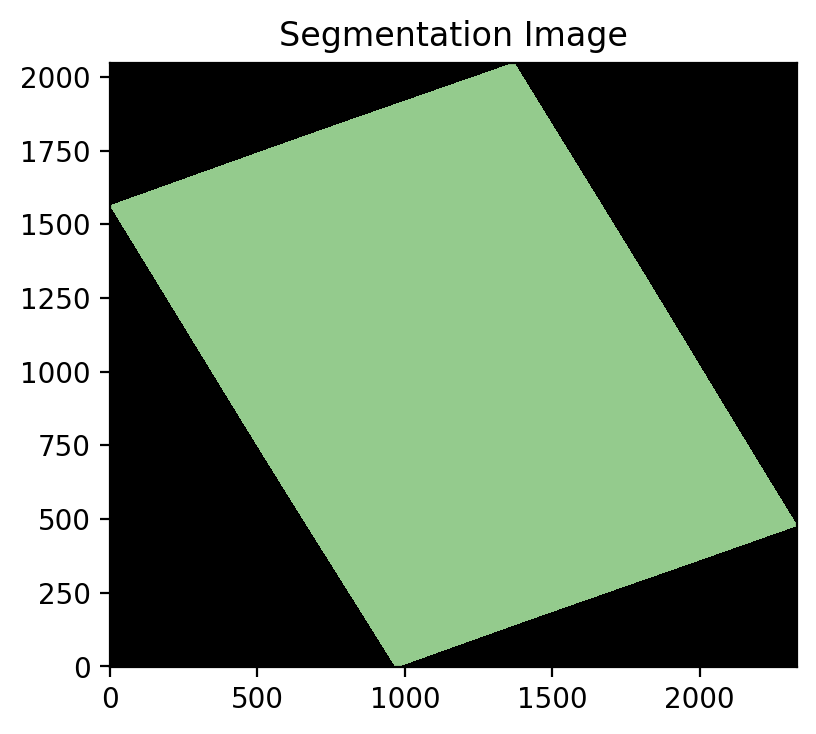

Creado el fichero Corr_iss030e244812B4F.cal2N.Ao2_rect.fits_con_fondo_.tiff


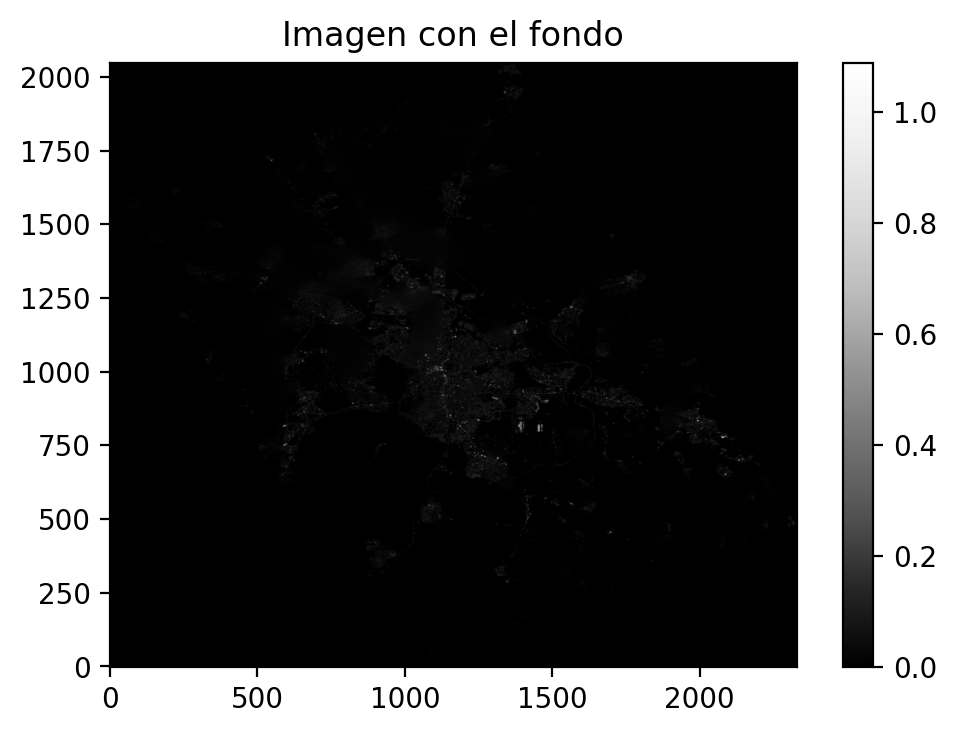

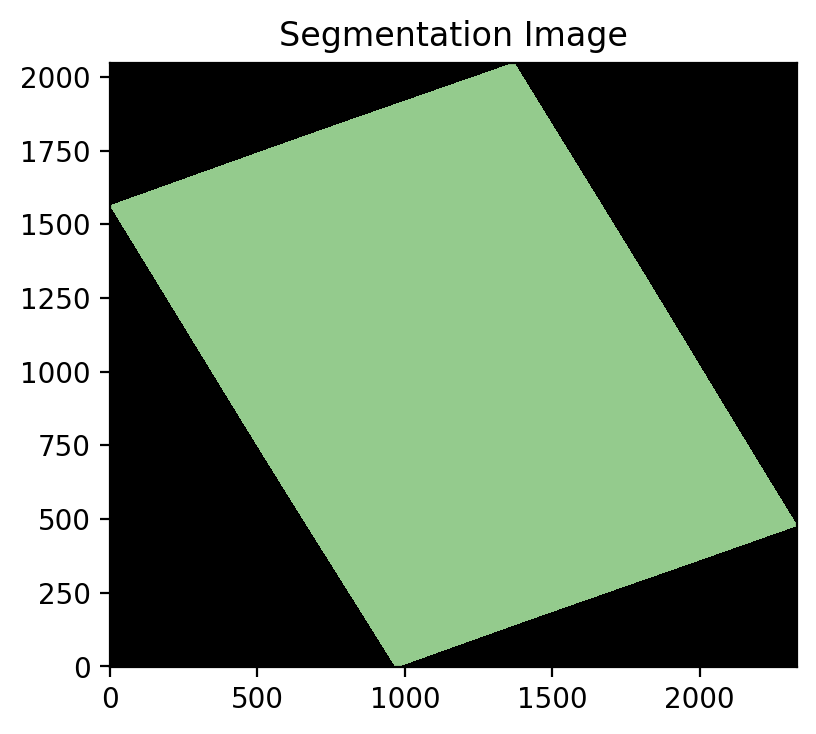

Creado el fichero Corr_iss030e244812G2F.cal2N.Ao2_rect.fits_con_fondo_.tiff


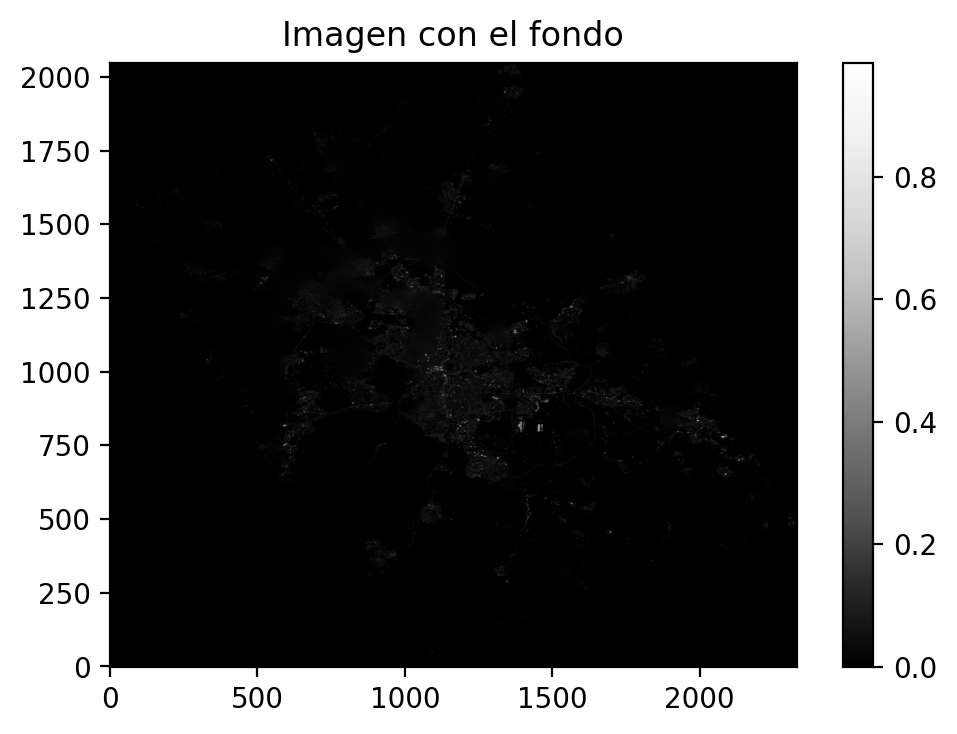

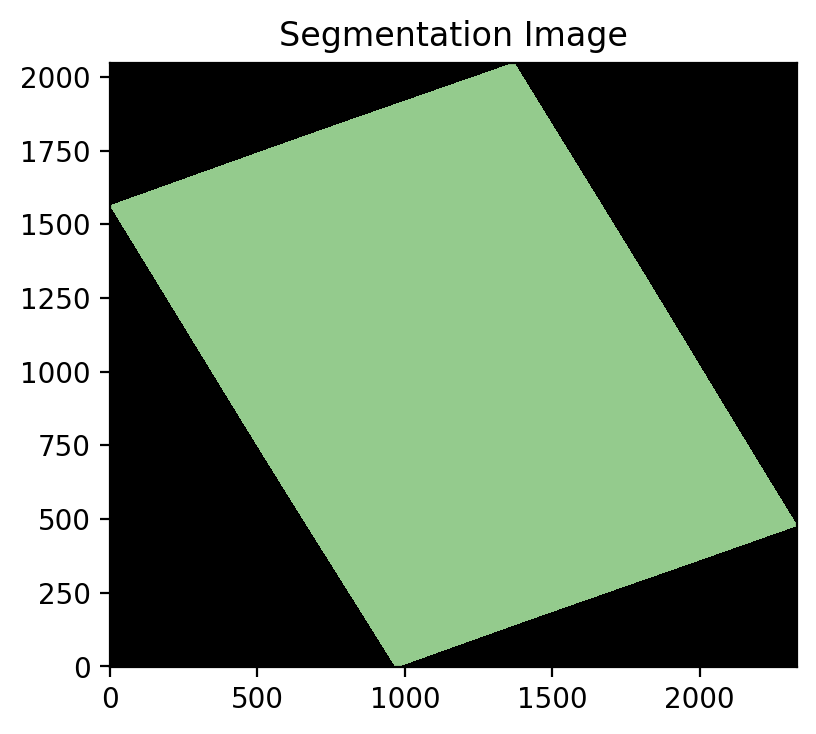

Creado el fichero Corr_iss030e244812G3F.cal2N.Ao2_rect.fits_con_fondo_.tiff


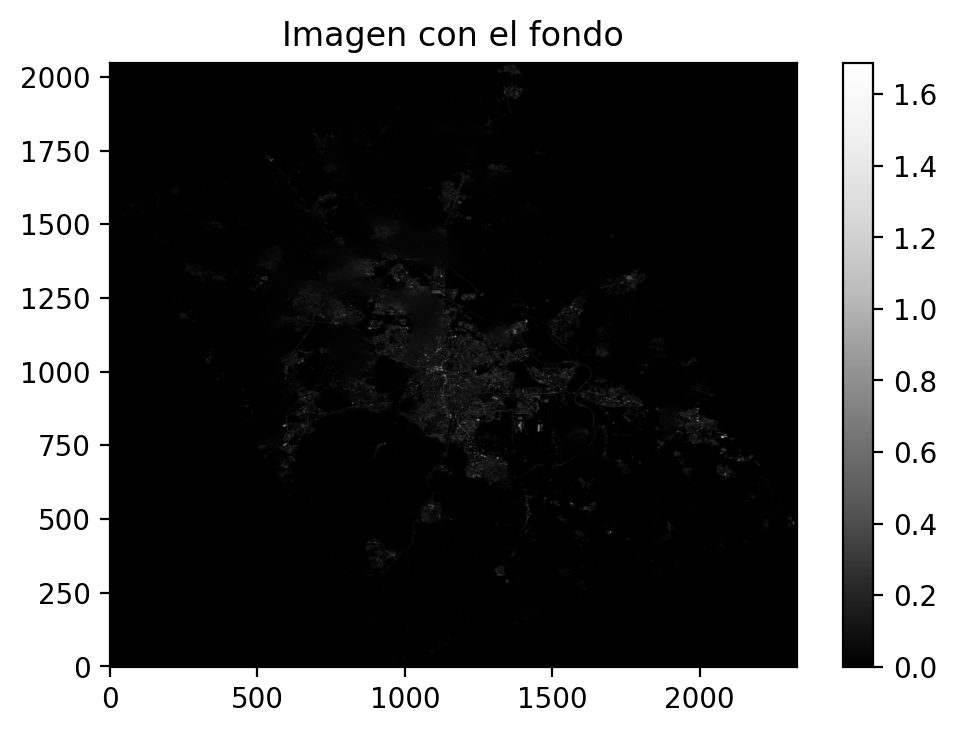

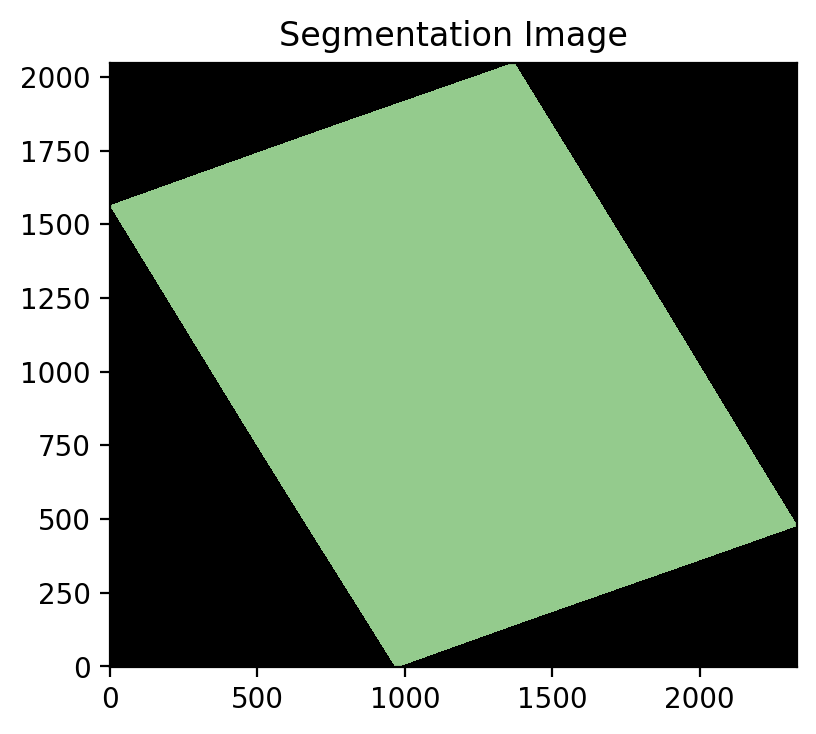

Creado el fichero Corr_iss030e244812R1F.cal2N.Ao2_rect.fits_con_fondo_.tiff


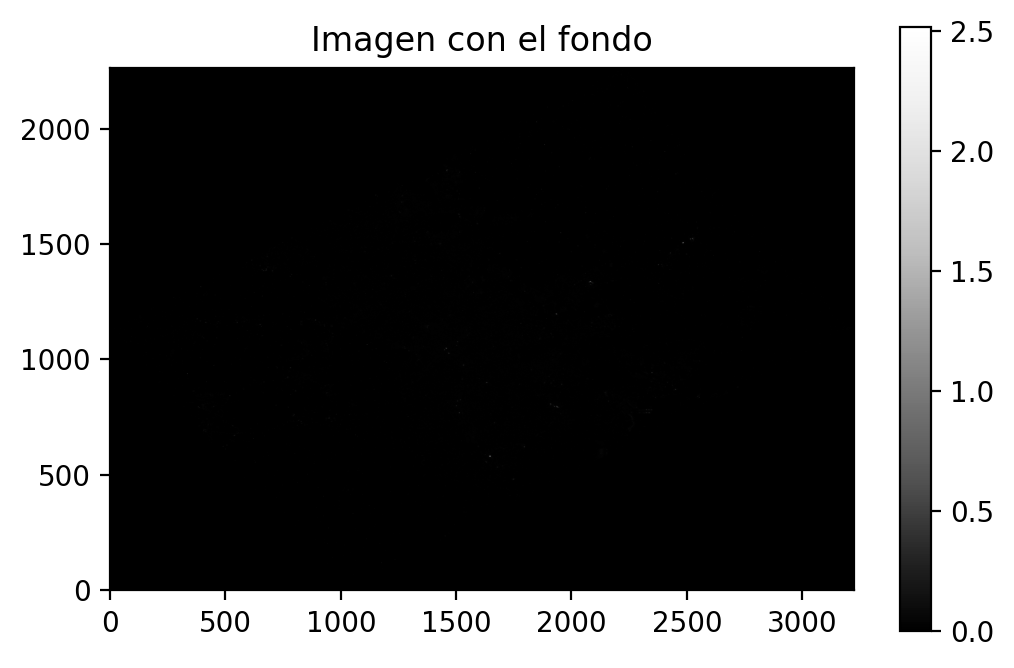

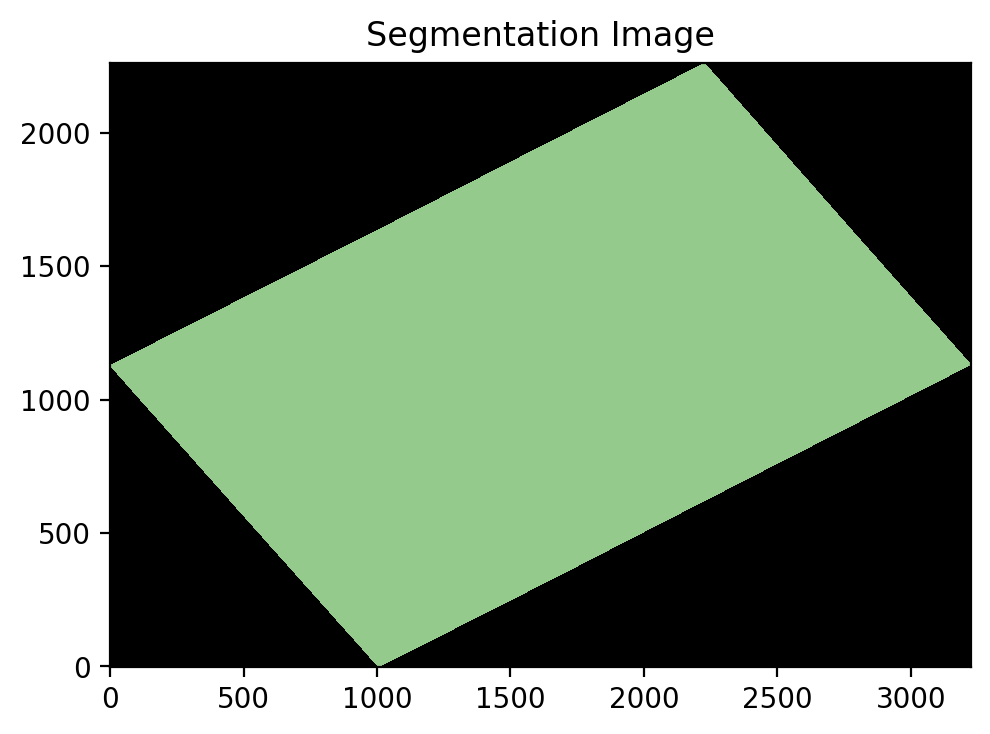

Creado el fichero Corr_iss030e274870B4F.cal2N.Ao2_rect.fits_con_fondo_.tiff


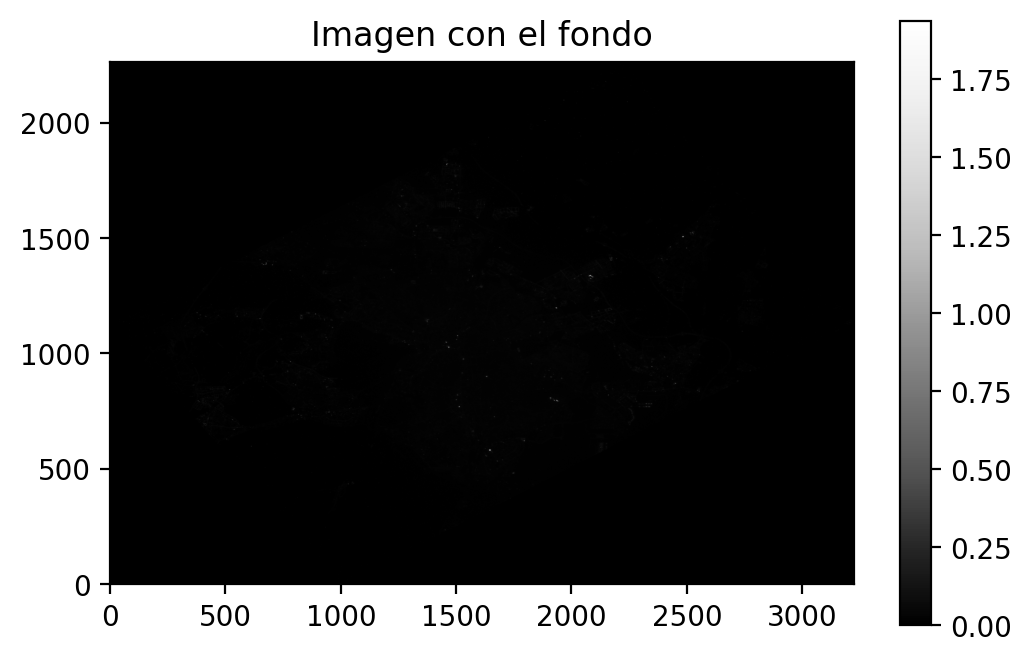

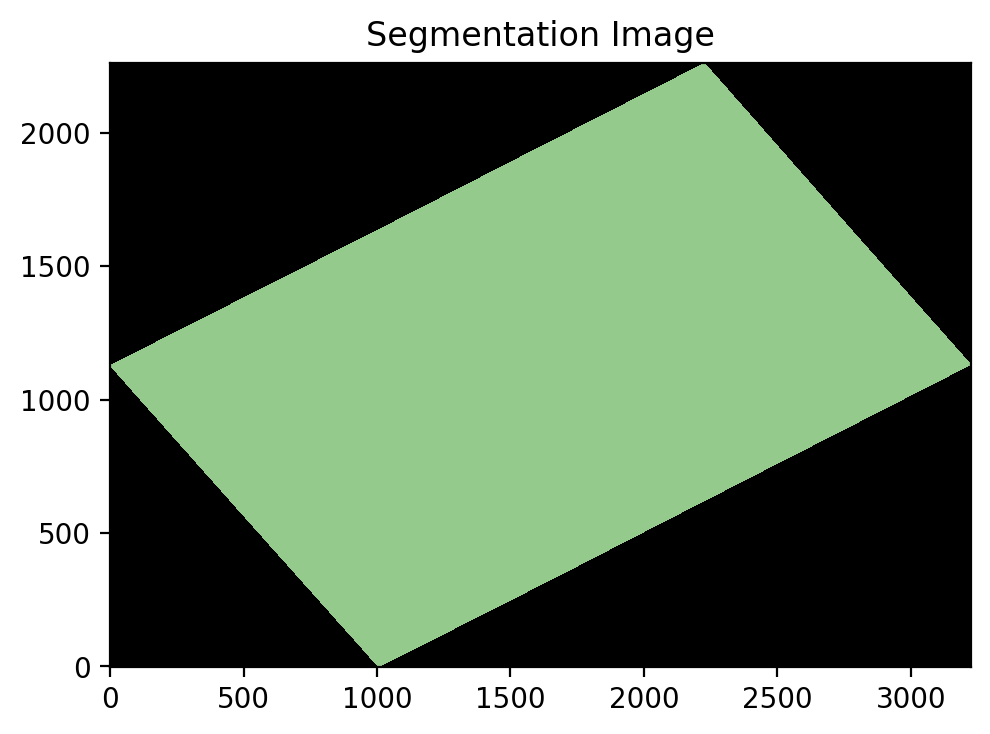

Creado el fichero Corr_iss030e274870G2F.cal2N.Ao2_rect.fits_con_fondo_.tiff


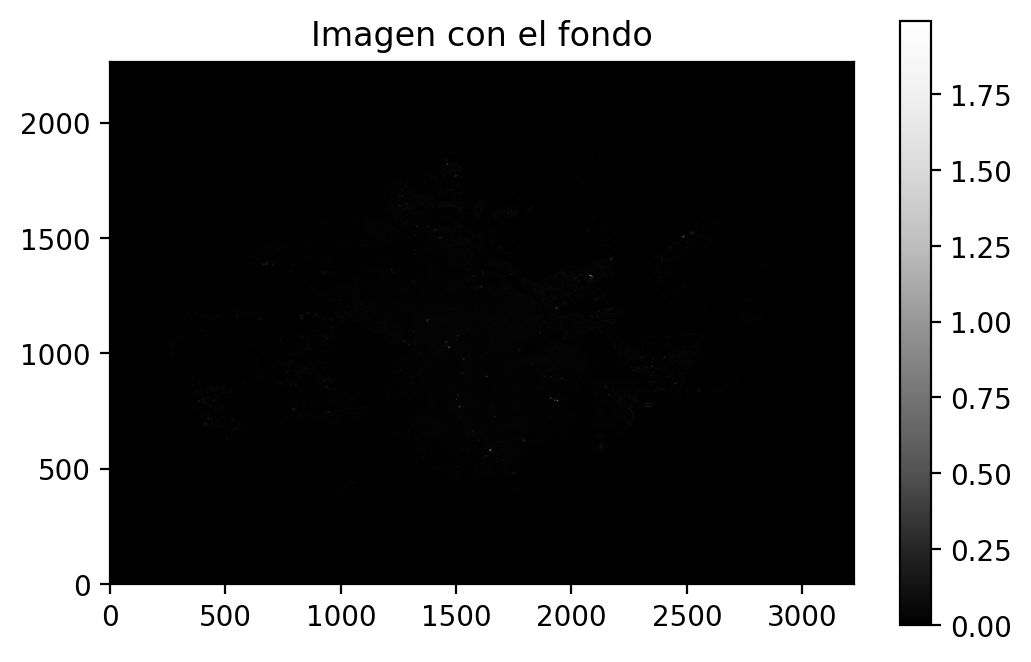

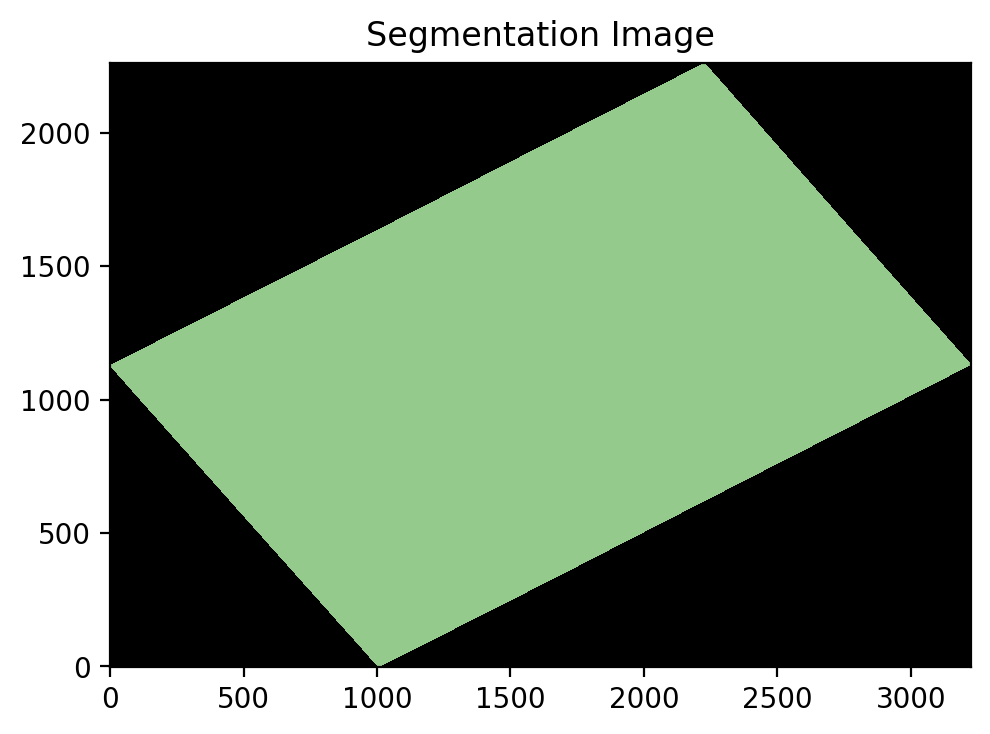

Creado el fichero Corr_iss030e274870G3F.cal2N.Ao2_rect.fits_con_fondo_.tiff


KeyboardInterrupt: 

In [18]:
#ALGORITMO DE DETECCION DE FUENTES EXTENSAS 2: SEGMENTACION SIN SUSTRAER EL FONDO

directory_load = '.\Ficheros_fits_test\\'
# directory_save='.\Fuentes_extensas\\'
files = [i for i in os.listdir(directory_load)]

for index, file in enumerate(files):
    img = fits.open(directory_load+file)
    data = img[0].data
    
    #*SEGMENTACIÓN, FUENTES EXTENSAS PARA N IMÁGENES*
    
    threshold = detect_threshold(data, nsigma=1.4) #(2.0 antes) number of standard deviations (per pixel) above the background
    sigma = 3 * gaussian_fwhm_to_sigma  # FWHM = 3.
    kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
    kernel.normalize()
    segm = detect_sources(data, threshold, npixels=5, filter_kernel=kernel) #npixels=connected pixels that are each greater than the corresponding pixel-wise threshold level defined
    norm = ImageNormalize(stretch=SqrtStretch())
    plt.imshow(data, origin='lower', cmap='Greys_r')
    cmap = segm.make_cmap(random_state=12345)

    plt.title('Imagen con el fondo')
    plt.colorbar()
    plt.show()
    imshow(segm, origin='lower', cmap=cmap)

    plt.title('Segmentation Image')
    plt.show()
    plt.imsave(str(file)+'_con_fondo_'+'.tiff', segm, cmap=cmap)
    print('Creado el fichero '+str(file)+'_con_fondo_'+'.tiff')

In [7]:
#TEST. SE PUEDEN ABRIR REGIONES DEFINIDAS EN DS9 CON ESTO

# img = fits.open('C:\\Users\\Victor\\Dropbox\\2019-2020 Master Astro\\TFM\\Imagenes georeferenciadas\\Puntos de interés\\Ficheros_fits_test\\Corr_iss062e102209B4F.cal2N.Ao2_rect.fits')
# data = img[0].data
# import pyregion
# region_name = "region_favorita_img_coord.reg"
# r = pyregion.open(region_name)
# r

[Shape : projection ( Number(1302.75),Number(1751),Number(1334.75),Number(1812),Number(0) )]

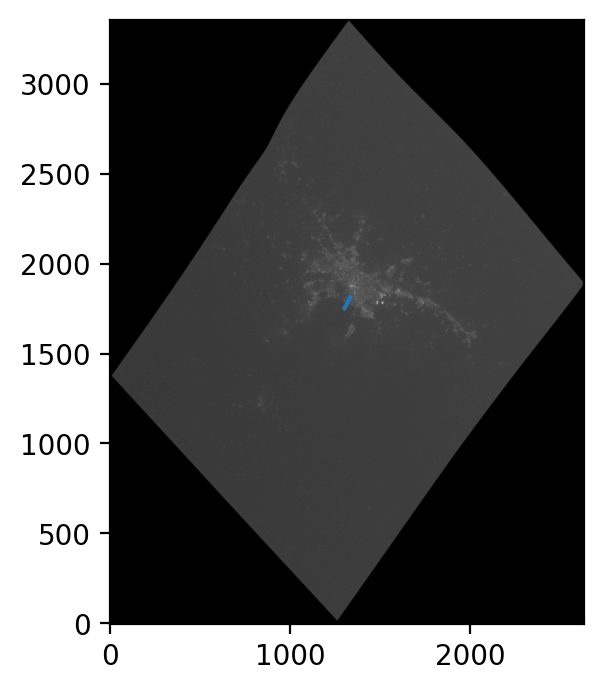

In [4]:
point1 = [1303, 1751] #puntos que definen el segmento
point2 = [1335, 1812]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]

plt.imshow(data, origin='lower',cmap='Greys_r')
plt.plot(x_values, y_values)
plt.show()

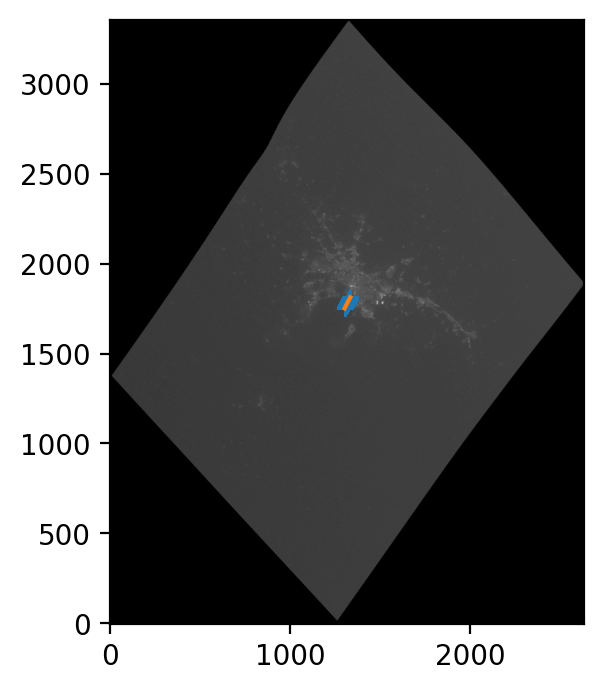

In [5]:
x=np.linspace(x_values[0], x_values[1], num=200)
x = [int(round(u)) for u in x]
y=np.linspace(y_values[0], y_values[1], num=200)
y = [int(round(v)) for v in y]
plt.imshow(data, origin='lower',cmap='Greys_r')
plt.plot(x, y,'+')
plt.plot(x_values, y_values)
plt.show()

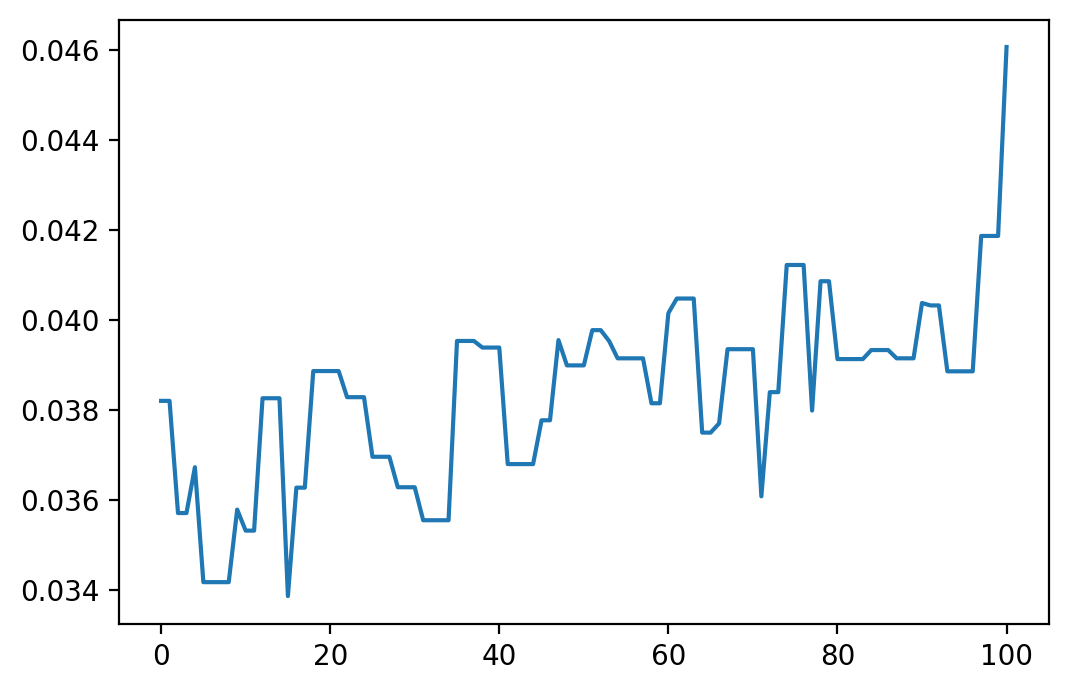

In [6]:
#Algun error hay aquí básico a la hora de evaluar los puntos sobre el archivo

w = np.linspace(0,100,101, dtype=int)
ds9_region_projection=[]

for i in w:
    punto=int(x[i]),int(y[i])
    ds9_region_projection+=[data[punto[1]][punto[0]]]
    
plt.plot(ds9_region_projection)
plt.show()